In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './data.txt'
data = pd.read_csv(path, header=None)
dataset = np.array(data)
X = dataset[:,0]
y = dataset[:,1]

Text(0.5, 1.0, 'Population vs Profit')

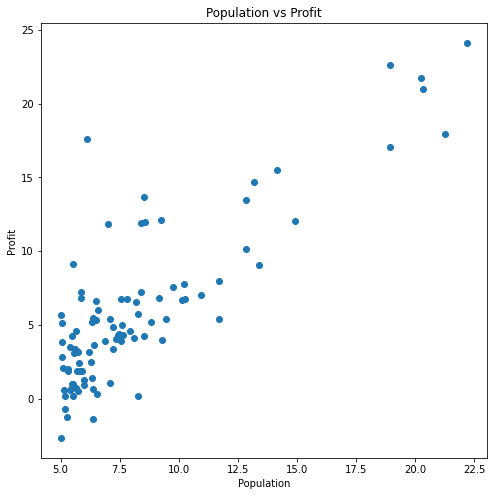

In [3]:
# Scatter Plotting of the Population vs Profit Graph
fig = plt.figure(figsize = (8, 8))
plt.scatter(X,y)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs Profit')

In [4]:
def calcMSE(X, y, w0, w1):
    n = len(X)
    error = np.power(((X*w1+w0)-y),2)
    mse = np.sum(error)/(2*n)
    return mse

In [5]:
def gradientDescent(dataset, w0, w1, learning_rate, itr):
    X = dataset[:,0]
    y = dataset[:,1]
    error = []
    w0_li = []
    w1_li = []
    
    for i in range(itr):
        err = (X*w1+w0) - y
        w0 = w0 - ((learning_rate/len(X))*np.sum(err))
        temp = np.multiply(err, X)
        w1 = w1 - ((learning_rate/len(X))*np.sum(temp))
        error.append(calcMSE(X, y, w0, w1))
        w0_li.append(w0)
        w1_li.append(w1)
        
    return w0, w1, error, w0_li, w1_li

In [6]:
lr = 0.01
iteration = 2000
w0, w1, error, w0_li, w1_li = gradientDescent(dataset, 0, 0, lr, iteration)
print("The intercept of the line = ",w0)
print("The slope of the line = ",w1)
print("The mean square error = ", error[iteration-1])

The intercept of the line =  -3.78806857272311
The slope of the line =  1.1822127747573767
The mean square error =  4.47802760987997


Text(0.5, 1.0, 'Population vs Profit')

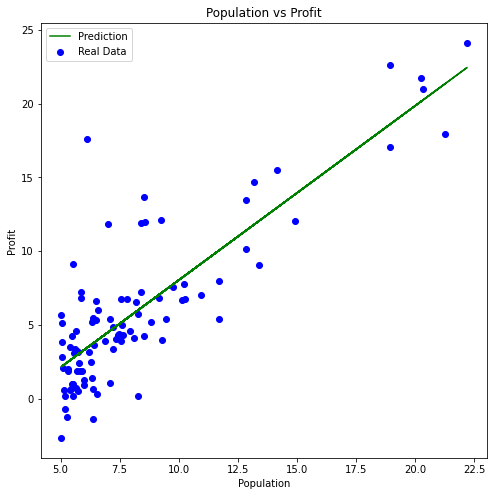

In [7]:
# Plotting of the Linear Regression Hypothesis
Y_pred = X*w1+w0
fig = plt.figure(figsize = (8, 8))
plt.scatter(X,y,color='blue',label='Real Data')
plt.plot(X,Y_pred,color='green',label='Prediction')
plt.legend(loc=2)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs Profit')

Text(0.5, 1.0, 'Learning Rate vs error')

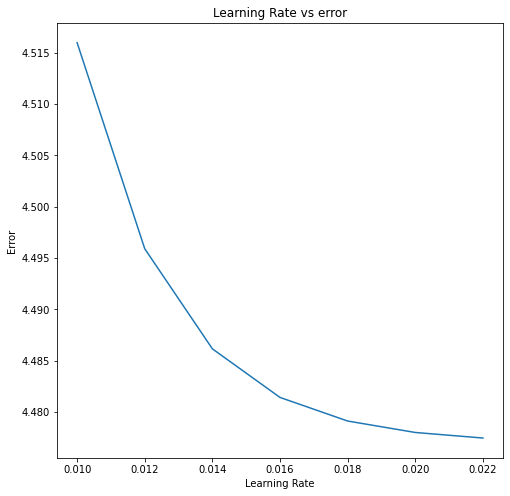

In [8]:
# Plotting the Error vs Learning Rate

fig = plt.figure(figsize = (8, 8))
lrs = [0.01,0.012,0.014,0.016,0.018,0.02,0.022]
lr_li = []
for i in range(0,len(lrs)):
    temp_w0, temp_w1, temp_err, temp_w0_li, temp_w1_li = gradientDescent(dataset, 0, 0, lrs[i], 1000)
    lr_li.append(temp_err[-1])

plt.plot(lrs,lr_li)
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.title('Learning Rate vs error')

Text(0.5, 1.0, 'Number of iterations vs error')

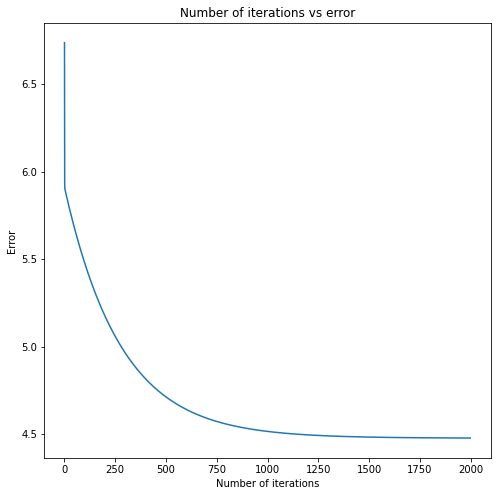

In [9]:
# Plotting the Error vs Number of iteration
fig = plt.figure(figsize = (8, 8))
itrs = np.arange(0,iteration,1)
plt.plot(itrs,error)
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Number of iterations vs error')

In [10]:
w0_vals = np.linspace(-10,0,100)
w1_vals = np.linspace(-1,4,100)
J = np.zeros((len(w0_vals), len(w1_vals)))

r=0; c=0
for i in w0_vals:
    for j in w1_vals:
        J[r][c] = calcMSE(X, y, i, j)
        c=c+1
    r=r+1
    c=0


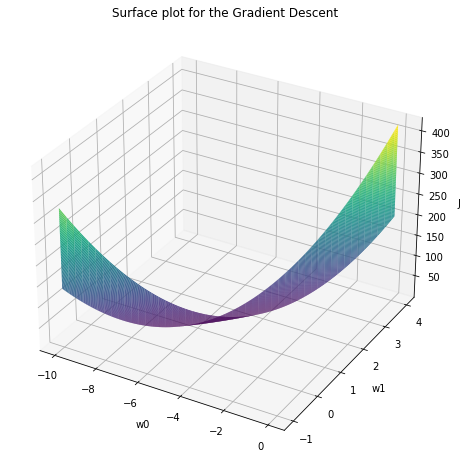

In [11]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(w0_vals, w1_vals, J, cmap='viridis')
ax.set_title('Surface plot for the Gradient Descent')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('J')
plt.show()

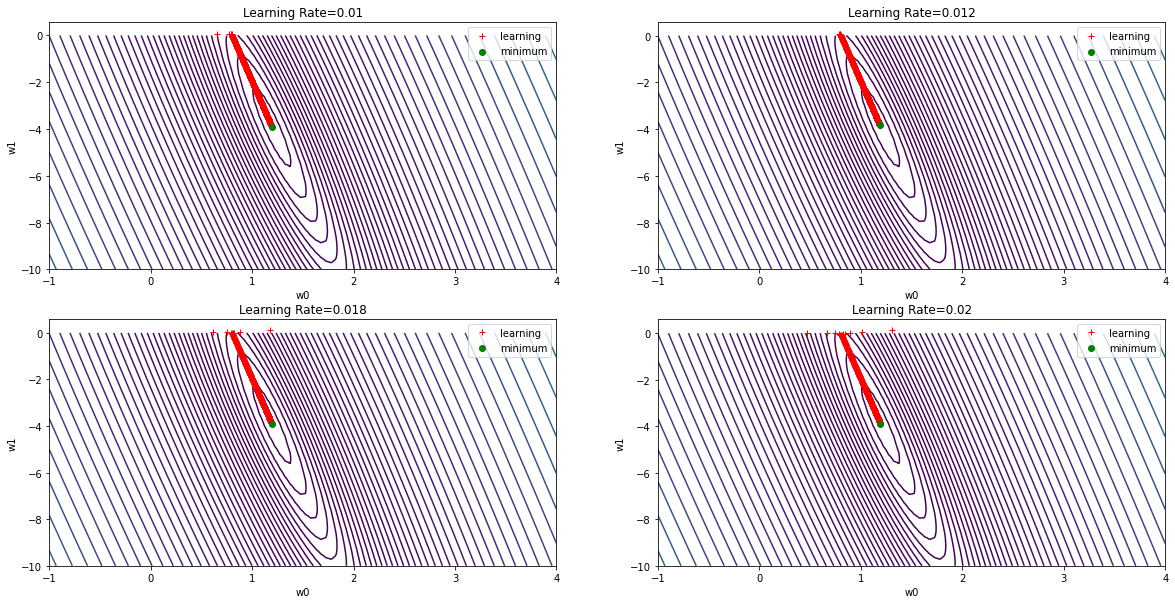

In [12]:
# Contour Plot of the loss function with the learning_rate = 0.01
plt.figure(figsize=(20,10))

w0, w1, error, w0_li, w1_li = gradientDescent(dataset, 0, 0, 0.01, 5000)
plt.subplot(221)
plt.contour(w1_vals,w0_vals,J,levels = np.logspace(-2,3,100))
plt.xlabel('w0')
plt.ylabel('w1')
plt.plot(w1_li, w0_li,'r+',label='learning')
plt.scatter(w1,w0,color='green',zorder=10,label='minimum')
plt.legend(loc=0)
plt.title('Learning Rate=0.01')

w0, w1, error, w0_li, w1_li = gradientDescent(dataset, 0, 0, 0.012, 2000)
plt.subplot(222)
plt.contour(w1_vals,w0_vals,J,levels = np.logspace(-2,3,100))
plt.xlabel('w0')
plt.ylabel('w1')
plt.plot(w1_li, w0_li,'r+',label='learning')
plt.scatter(w1,w0,color='green',zorder=10,label='minimum')
plt.legend(loc=0)
plt.title('Learning Rate=0.012')

w0, w1, error, w0_li, w1_li = gradientDescent(dataset, 0, 0, 0.018, 2000)
plt.subplot(223)
plt.contour(w1_vals,w0_vals,J,levels = np.logspace(-2,3,100))
plt.xlabel('w0')
plt.ylabel('w1')
plt.plot(w1_li, w0_li,'r+',label='learning')
plt.scatter(w1,w0,color='green',zorder=10,label='minimum')
plt.legend(loc=0)
plt.title('Learning Rate=0.018')

w0, w1, error, w0_li, w1_li = gradientDescent(dataset, 0, 0, 0.02, 2000)
plt.subplot(224)
plt.contour(w1_vals,w0_vals,J,levels = np.logspace(-2,3,100))
plt.xlabel('w0')
plt.ylabel('w1')
plt.plot(w1_li, w0_li,'r+',label='learning')
plt.scatter(w1,w0,color='green',zorder=10,label='minimum')
plt.legend(loc=0)
plt.title('Learning Rate=0.02')
plt.show()